In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
Folder_JB = 'J.Full_year_operational_cost/Results/B.Operation_cost'
Folder_JD = 'J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand'
Folder_JE = 'J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_JK = 'J.Full_year_operational_cost/Results/K.Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour'

# Folder_JB = 'J.Full_year_operational_cost/Results/B'
# Folder_JD = 'J.Full_year_operational_cost/Results/D'
# Folder_JE = 'J.Full_year_operational_cost/Results/E'
# Folder_JK = 'J.Full_year_operational_cost/Results/K'
# Folder_JL = 'J.Full_year_operational_cost/Results/L'

Folder_B = "B.Operation_cost"
DirName  = os.getcwd()
category_dict = {
                 Folder_B: "OPC",
                 Folder_JB: "OPC_fy",
                 Folder_JD: "R&D_fy",
                 Folder_JE: "OPT_LB_fy",
                 Folder_JK: "HI_fy",
                 Folder_JL: "CHI_fy"
                }

In [3]:
def LoadingData(dir, folder,result, case, ncluster, cm):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join( folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        #df = pd.read_csv(os.path.join( folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])
        df = pd.read_csv(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv",index_col=[0,1])
    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Case'] = case
    df['Clustering method'] = cm
    df['Number of clusters'] = ncluster
    df = df.reset_index()
    if result == "CostSummary":
        df["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
    print(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv")
    return df

In [52]:
df_all = pd.DataFrame()

cases = ["IEEE118","IEEE118_mod1","IEEE118_mod2"]
cases = ["IEEE118"]#,"IEEE118_mod1","IEEE118_mod2"]
folders = [Folder_JB,Folder_JD,Folder_JE,Folder_JK,Folder_JL]
nbcs = [10,20,30,40,50,60,70,80,90,100]#,110,120,130,140,150]

for case in cases: 
    for nbc in nbcs:
        for folder in folders: 
            df = LoadingData(DirName,folder,"NetworkInvestment",case,nbc,category_dict[folder])
            df_all = pd.concat([df_all,df])


J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_Bystages_nc10.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand/IEEE118_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_Bystages_nc10.csv
J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_Bystages_nc10.csv
J.Full_year_operational_cost/Results/K.Investments_per_hour/IEEE118_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_Bystages_nc10.csv
J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_Bystages_nc10.csv
J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_Bystages_nc20.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand/IEEE118_Bystages_n

In [53]:
df_all['Nodes'] = df_all['InitialNode'].astype(str) + " - " + df_all['FinalNode'].astype(str)
df_all['p.u.'] = df_all['p.u.'].astype(int)
df_all

,Period,InitialNode,FinalNode,Circuit,p.u.,CaseName,Case,Clustering method,Number of clusters,Nodes
0,2030,bus080,bus099,cac1,1,J.Full_year_operational_cost/Results/B.Operati...,IEEE118,OPC_fy,10,bus080 - bus099
1,2030,bus038,bus065,cac2,1,J.Full_year_operational_cost/Results/B.Operati...,IEEE118,OPC_fy,10,bus038 - bus065
2,2030,bus015,bus033,cac2,1,J.Full_year_operational_cost/Results/B.Operati...,IEEE118,OPC_fy,10,bus015 - bus033
3,2030,bus023,bus032,cac1,1,J.Full_year_operational_cost/Results/B.Operati...,IEEE118,OPC_fy,10,bus023 - bus032
4,2030,bus005,bus006,cac2,0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118,OPC_fy,10,bus005 - bus006
...,...,...,...,...,...,...,...,...,...,...
40,2030,bus030,bus038,cac1,1,J.Full_year_operational_cost/Results/L.Cont_In...,IEEE118,CHI_fy,100,bus030 - bus038
41,2030,bus038,bus065,cac1,1,J.Full_year_operational_cost/Results/L.Cont_In...,IEEE118,CHI_fy,100,bus038 - bus065
42,2030,bus017,bus113,cac2,0,J.Full_year_operational_cost/Results/L.Cont_In...,IEEE118,CHI_fy,100,bus017 - bus113
43,2030,bus093,bus094,cac2,0,J.Full_year_operational_cost/Results/L.Cont_In...,IEEE118,CHI_fy,100,bus093 - bus094


In [58]:
df_pivot = df_all.pivot_table(
    index="Nodes", 
    columns=["Clustering method","Case"], 
    values="p.u.", 
    aggfunc="mean"  # Custom function to count values greater than 0
)
df_pivot = df_pivot[~(df_pivot == 1).all(axis=1)] 
df_pivot = df_pivot[~(df_pivot == 0).all(axis=1)] 
df_pivot

Clustering method,CHI_fy,HI_fy,OPC_fy,OPT_LB_fy,R&D_fy
Case,IEEE118,IEEE118,IEEE118,IEEE118,IEEE118
Nodes,,,,,
bus001 - bus003,0.00,0.10,0.60,0.60,0.10
bus005 - bus006,0.50,0.50,0.50,0.50,0.50
bus015 - bus017,0.90,1.00,0.90,1.00,1.00
bus015 - bus033,0.95,1.00,1.00,1.00,1.00
bus017 - bus113,0.60,0.50,0.55,0.50,0.50
bus023 - bus032,1.00,0.90,1.00,1.00,0.95
bus025 - bus027,0.00,0.00,0.05,0.00,0.00
bus026 - bus030,0.20,0.00,0.35,0.45,0.00


In [74]:
df_pivot_ = df_pivot.reset_index(drop=True)
df_centered = df_pivot_.subtract(df_pivot_.mean(axis=1), axis=0)

In [75]:
df_centered

Clustering method,CHI_fy,HI_fy,OPC_fy,OPT_LB_fy,R&D_fy
Case,IEEE118,IEEE118,IEEE118,IEEE118,IEEE118
0,-0.28,-0.18,0.32,0.32,-0.18
1,0.00,0.00,0.00,0.00,0.00
2,-0.06,0.04,-0.06,0.04,0.04
3,-0.04,0.01,0.01,0.01,0.01
4,0.07,-0.03,0.02,-0.03,-0.03
5,0.03,-0.07,0.03,0.03,-0.02
6,-0.01,-0.01,0.04,-0.01,-0.01
7,0.00,-0.20,0.15,0.25,-0.20
8,-0.06,0.04,0.04,0.04,-0.06


<Axes: >

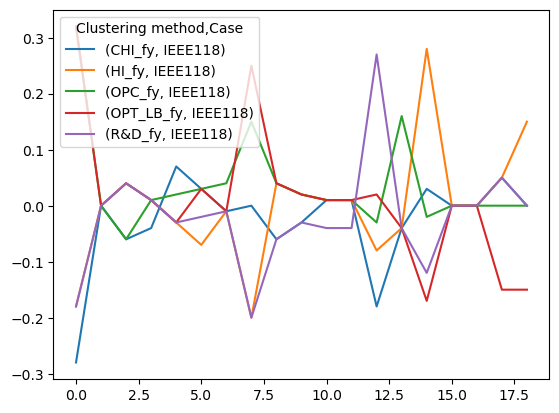

In [76]:
df_centered.plot()

In [78]:
df_centered.corr()

,Clustering method,CHI_fy,HI_fy,OPC_fy,OPT_LB_fy,R&D_fy
,Case,IEEE118,IEEE118,IEEE118,IEEE118,IEEE118
Clustering method,Case,,,,,
CHI_fy,IEEE118,1.000000,0.446417,-0.557756,-0.620766,-0.070753
HI_fy,IEEE118,0.446417,1.000000,-0.621469,-0.838373,0.120424
OPC_fy,IEEE118,-0.557756,-0.621469,1.000000,0.709069,-0.619095
OPT_LB_fy,IEEE118,-0.620766,-0.838373,0.709069,1.000000,-0.422633
R&D_fy,IEEE118,-0.070753,0.120424,-0.619095,-0.422633,1.000000


In [81]:
df_pivot.corr()

,Clustering method,CHI_fy,HI_fy,OPC_fy,OPT_LB_fy,R&D_fy
,Case,IEEE118,IEEE118,IEEE118,IEEE118,IEEE118
Clustering method,Case,,,,,
CHI_fy,IEEE118,1.000000,0.968420,0.926479,0.881805,0.939126
HI_fy,IEEE118,0.968420,1.000000,0.911095,0.847046,0.943197
OPC_fy,IEEE118,0.926479,0.911095,1.000000,0.967587,0.890088
OPT_LB_fy,IEEE118,0.881805,0.847046,0.967587,1.000000,0.867265
R&D_fy,IEEE118,0.939126,0.943197,0.890088,0.867265,1.000000


<Axes: xlabel='Clustering method-Case', ylabel='Clustering method-Case'>

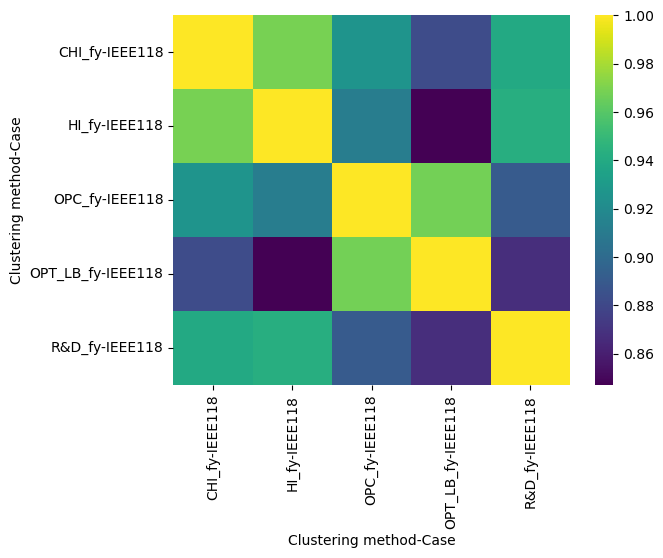

In [90]:
sns.heatmap(data = df_pivot.corr(),cmap = "viridis")

<Axes: xlabel='Clustering method-Case', ylabel='Clustering method-Case'>

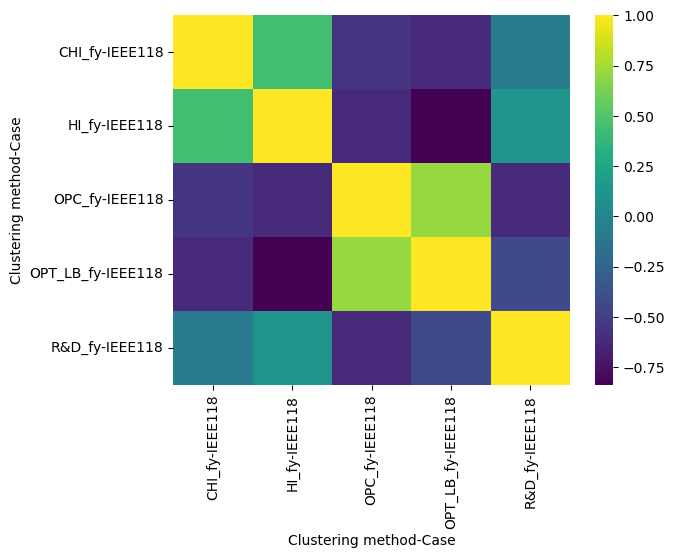

In [91]:
sns.heatmap(data = df_centered.corr(),cmap = "viridis")